In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='37c38aec-dd59-459e-9476-b66647391e91', project_access_token='p-3e4938acbcfb7a4c93c09bb850f913ff5338e297')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

<hr>

## Installing Libs

In [2]:
!pip install scikit-learn --upgrade
!pip install imblearn

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [3]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


<hr>

## Loading the .csv dataset from GitHub

In [4]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold, cross_validate, cross_val_score, RandomizedSearchCV

In [5]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
df_base_for_training = pd.read_csv(r'ForTraining.csv')
df_base_for_training.head()

--2020-09-14 18:19:13--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92376 (90K) [text/plain]
Saving to: ‘ForTraining.csv.3’

100%[======================================>] 92,376      --.-K/s   in 0.006s  

2020-09-14 18:19:13 (16.0 MB/s) - ‘ForTraining.csv.3’ saved [92376/92376]



studentId            reducido      ciclo Graduado
0    88588.0        Interv. Edu.  2019 - 08       No
1    81135.0           Educacion  2019 - 05       Si
2    80926.0  Direc. Estrat. Neg  2019 - 05       Si
3    82415.0               B. I.  2019 - 06       Si
4    90082.0       Est. Temprana  2019 - 08       No

Descripción: La primera tabla mostrada arriba tiene 4 columnas, 3 son features and el target: `Graduado` that has a binary values={Si, No}.

Usted puede, y debe, usar mas data que esta disponible para construir su modelo. Los siguientes archivos .csv presentados:

In [6]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')
df_orden_materias.head(100)

--2020-09-14 18:19:13--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63920 (62K) [text/plain]
Saving to: ‘OrdenMaterias.csv.3’

100%[======================================>] 63,920      --.-K/s   in 0.003s  

2020-09-14 18:19:14 (19.3 MB/s) - ‘OrdenMaterias.csv.3’ saved [63920/63920]



reducido                      2017 - 03  \
0      Act. Derecho Contratual                      Sin clase   
1                    Adm. Emp.                      Sin clase   
2                 Adm. Riesgos                      Sin clase   
3                   Adm. Salud                      Sin clase   
4                   Admon Fin.                      Sin clase   
5           Alim. Y Nut. Salud                      Sin clase   
6                Analitica Web                      Sin clase   
7                   Autolesion                      Sin clase   
8                        B. I.                      Sin clase   
9        Bien. Salud y Calidad                      Sin clase   
10                    Big Data                      Sin clase   
11             Big Data en Edu                      Sin clase   
12              Bio. Nutricion                      Sin clase   
13                  Blockchain                      Sin clase   
14              Bus. Analytics                      Sin clase   
15           Calidad Educativa                      Sin clase   
16               Ciberjusticia                      Sin clase   
17              Ciberseguridad                      Sin clase   
18             Cloud Computing                      Sin clase   
19            Coaching de Vida                      Sin clase   
20               Coaching Edu.                      Sin clase   
21                  Com. Corp.                      Sin clase   
22  Com. Estra. Respon. Social                      Sin clase   
23            Com. Mindfulness                      Sin clase   
24         Comp. Dig. Docentes  La Tecnología en la Educación   
25            Comp. Directivas                      Sin clase   
26            Comp. Doc. S XXI                      Sin clase   
27               Crianza Hijos                      Sin clase   
28               Dere. Digital                      Sin clase   
29             Dere. Sanitario                      Sin clase   
..                         ...                            ...   
70                       I. A.                      Sin clase   
71                   Inc. Edu.                      Sin clase   
72           Inclusion Laboral                      Sin clase   
73            Inn. Diseno Edu.                      Sin clase   
74               Inn. Negocios                      Sin clase   
75              Inn. Tec. Edu.                      Sin clase   
76                Interv. Edu.                      Sin clase   
77            Interv. Psicoped                      Sin clase   
78                  Intro. Fin   Finanzas para no Financieros   
79               Inv. Mercados                      Sin clase   
80           Lider. Inst. Edu.                      Sin clase   
81             Lit. Lat. S. XX                      Sin clase   
82              Marca Personal                      Sin clase   
83                  Med. Sueno                      Sin clase   
84               Mercadotecnia         Liderazgo y Motivación   
85                Mkt. Digital                      Sin clase   
86           Mkt. Farmaceutico                      Sin clase   
87        Mkt. Farmaceutico A.                      Sin clase   
88              Monitores Esc.                      Sin clase   
89         Neg. Dig. Y Eco. C.                      Sin clase   
90              Neuromarketing                      Sin clase   
91       Nutricion y Antiaging                      Sin clase   
92              Obesidad. Inf.                      Sin clase   
93              Oren. Edu. Fam                      Sin clase   
94               P. Aux. Psic.                      Sin clase   
95          Planeacion Estrat.         Liderazgo y Motivación   
96             Precios Transf.                      Sin clase   
97              Prin. Fiscales                      Sin clase   
98            Prof. Deportiva.                      Sin clase   
99            Prog. Neuroling.                      Sin c

In [7]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')
df_tabla_conexiones.head()

--2020-09-14 18:19:14--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243492 (238K) [text/plain]
Saving to: ‘TablaConexiones.csv.3’

100%[======================================>] 243,492     --.-K/s   in 0.05s   

2020-09-14 18:19:15 (4.35 MB/s) - ‘TablaConexiones.csv.3’ saved [243492/243492]



studentId      ciclo  Dias_Conectado  Minutos_Promedio  Minutos_Total
0      45870  2017 - 03            10.0         76.957000         769.57
1      45898  2017 - 03            32.0        370.231250       11847.40
2      45905  2017 - 03            50.0        198.717400        9935.87
3      45931  2017 - 03            22.0        294.535909        6479.79
4      45933  2017 - 03            18.0        177.991667        3203.85

In [8]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')
df_tabla_tareas.head()

--2020-09-14 18:19:16--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310923 (304K) [text/plain]
Saving to: ‘TablaTareas.csv.3’

100%[======================================>] 310,923     --.-K/s   in 0.02s   

2020-09-14 18:19:16 (15.6 MB/s) - ‘TablaTareas.csv.3’ saved [310923/310923]



studentId      ciclo  Calificacion_Promedio  Tareas_Puntuales  \
0    81328.0  2019 - 05              99.000000              10.0   
1    99206.0  2020 - 02              80.777500              10.0   
2    94582.0  2020 - 01              79.666000              10.0   
3    87564.0  2019 - 07               0.000000               0.0   
4    87971.0  2019 - 08              36.363636               5.0   

   Tareas_No_Entregadas  Tareas_Retrasadas  Total_Tareas  
0                   0.0                0.0          10.0  
1                   2.0                0.0          12.0  
2                   0.0                0.0          10.0  
3                  15.0                0.0          15.0  
4                   6.0                0.0          11.0

Overview del Dataset:

    Disponibles para el participante, ecisten 4 tables cargas en DataFrames anteriormente:
    
    **df_base_for_training**
        - ``studentId``
        ``reducido``
        ``ciclo``
        ``Graduado`` --> ¡LA VARIABLE OBJETIVO PARA CLASIFICACIÓN BINARIA!
        
    **df_orden_materias**
        ``reducido``
        ``2017 - 03``
        ``2017 - 04``
        ``2017 - 05``
        ``2017 - 06``
        ``2017 - 07``
        ``2017 - 08``
        ``2018 - 01``
        ``2018 - 02``
        ``2018 - 03``
        ``2018 - 04``
        ``2018 - 05``
        ``2018 - 06``
        ``2018 - 07``
        ``2018 - 08``
        ``2019 - 01``
        ``2019 - 02``
        ``2019 - 03``
        ``2019 - 04``
        ``2019 - 05``
        ``2019 - 06``
        ``2019 - 07``
        ``2019 - 08``
        ``2020 - 01``
        ``2020 - 02``
        ``2020 - 03``
        ``2020 - 04``
        ``2020 - 05``
        ``2020 - 06``
        
    **df_tabla_conexiones**
        - ``studentId``
        ``ciclo``
        ``Dias_Conectado``
        ``Minutos_Promedio``
        ``Minutos_Total``
        
    **df_tabla_tareas**
        - ``studentId``
        ``ciclo``
        ``Calificacion_Promedio``
        ``Tareas_Puntuales``
        ``Tareas_No_Entregadas``
        ``Tareas_Retrasadas``
        ``Total_Tareas``
        
Observe que la variable ``studentId`` aparece en varias tablas.

Usted puede combinar/merge estos datasets como usted desee.

In [9]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\Columnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\Columnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\Columnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

Columnas en *df_base_for_training*:
Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
\Columnas en *df_orden_materias*:
Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
\Columnas en *df_tabla_conexiones*:
Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
\Columnas en *df_tabla_tareas*:
Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

<hr>

## Uniendo DataFrames en Pandas

Documentación oficial para Pandas 1.1.0: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Como un **ejemplo** de como usar Pandas, camos a unir/merge la información de las tablas "df_base_for_training" y "df_tabla_tareas" a traves de la llave ``studentId``.

Usted puee editar el dataframes manualmente si lo prefiere, usando Microsoft Excel u otros lenguajes. Recuerde insertar la data procesada en IBM Cloud Pak for Data para que pueda entrenar su modelo.

In [10]:
df_base_for_training.tail()

studentId           reducido      ciclo Graduado
2495    89685.0  Estrat. Comercial  2019 - 08       No
2496    77590.0      Crianza Hijos  2019 - 06       Si
2497    57623.0      Mercadotecnia  2018 - 02       Si
2498    50018.0  Lider. Inst. Edu.  2017 - 05       No
2499    88250.0   Prof. Deportiva.  2019 - 08       No

In [11]:
df_tabla_tareas.tail()

studentId      ciclo  Calificacion_Promedio  Tareas_Puntuales  \
6293    80467.0  2019 - 05              20.000000               1.0   
6294    80249.0  2019 - 05              50.600000               3.0   
6295    85857.0  2019 - 07              81.428571              13.0   
6296    98880.0  2020 - 02              91.212727              11.0   
6297    71859.0  2019 - 02              87.333000              10.0   

      Tareas_No_Entregadas  Tareas_Retrasadas  Total_Tareas  
6293                   4.0                0.0           5.0  
6294                   2.0                0.0           5.0  
6295                   1.0                0.0          14.0  
6296                   0.0                0.0          11.0  
6297                   0.0                0.0          10.0

In [12]:
df_base_for_training[df_base_for_training['studentId']==50018]

studentId           reducido      ciclo Graduado
2498    50018.0  Lider. Inst. Edu.  2017 - 05       No

In [13]:
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``studentId`` como llave.

df = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()

studentId         reducido      ciclo Graduado  Calificacion_Promedio  \
2495    91320.0        Adm. Emp.  2019 - 08       No              71.818182   
2496    91330.0            I. A.  2019 - 08       Si              81.333333   
2497    91331.0       Gest. Esc.  2019 - 08       No              73.333333   
2498    91335.0       Gest. Esc.  2019 - 08       Si              85.185556   
2499    91346.0  Psicopat. Adol.  2019 - 08       No              80.159333   

      Tareas_Puntuales  Tareas_No_Entregadas  Tareas_Retrasadas  Total_Tareas  
2495               9.0                   2.0                0.0          11.0  
2496              15.0                   0.0                0.0          15.0  
2497               9.0                   0.0                0.0           9.0  
2498               9.0                   0.0                0.0           9.0  
2499              15.0                   0.0                0.0          15.0

In [14]:
df_m = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df_m.tail()

studentId         reducido      ciclo Graduado  Calificacion_Promedio  \
2495    91320.0        Adm. Emp.  2019 - 08       No              71.818182   
2496    91330.0            I. A.  2019 - 08       Si              81.333333   
2497    91331.0       Gest. Esc.  2019 - 08       No              73.333333   
2498    91335.0       Gest. Esc.  2019 - 08       Si              85.185556   
2499    91346.0  Psicopat. Adol.  2019 - 08       No              80.159333   

      Tareas_Puntuales  Tareas_No_Entregadas  Tareas_Retrasadas  Total_Tareas  \
2495               9.0                   2.0                0.0          11.0   
2496              15.0                   0.0                0.0          15.0   
2497               9.0                   0.0                0.0           9.0   
2498               9.0                   0.0                0.0           9.0   
2499              15.0                   0.0                0.0          15.0   

      Dias_Conectado  Minutos_Promedio  Minutos_Total  
2495            21.0        468.019048        9828.40  
2496            90.0        431.348000       38821.32  
2497            27.0        171.675926        4635.25  
2498           102.0        256.105686       26122.78  
2499            26.0        230.841538        6001.88

In [15]:
df=df_m

In [16]:
def extraer_materia(x):
    reducido = x.reducido
    ciclo = x.ciclo
    return df_orden_materias[df_orden_materias['reducido']==reducido][ciclo].values[0]
df_val = df.apply(extraer_materia, axis=1)
df['materias'] = df_val
display(df)

studentId              reducido      ciclo Graduado  \
0       45898.0         Mercadotecnia  2017 - 03       Si   
1       45905.0            Intro. Fin  2017 - 03       No   
2       45931.0          Direc. Proy.  2017 - 03       No   
3       46063.0   Comp. Dig. Docentes  2017 - 03       Si   
4       46106.0            Gest. Esc.  2017 - 03       Si   
5       46180.0         Mercadotecnia  2017 - 03       No   
6       46324.0          Direc. Proy.  2017 - 03       Si   
7       46366.0    Planeacion Estrat.  2017 - 03       No   
8       46374.0             Educacion  2017 - 03       Si   
9       46443.0             Educacion  2017 - 03       Si   
10      46466.0           Hab. Geren.  2017 - 03       Si   
11      46561.0   Comp. Dig. Docentes  2017 - 04       No   
12      46569.0            Intro. Fin  2017 - 03       No   
13      46599.0          Direc. Proy.  2017 - 03       Si   
14      46665.0            Intro. Fin  2017 - 03       No   
15      46818.0            Intro. Fin  2017 - 03       No   
16      46872.0            Intro. Fin  2017 - 04       No   
17      46979.0          Direc. Proy.  2017 - 04       Si   
18      46994.0    Planeacion Estrat.  2017 - 04       Si   
19      47000.0      Comp. Directivas  2017 - 04       Si   
20      47028.0            Intro. Fin  2017 - 04       No   
21      47072.0            Intro. Fin  2017 - 05       No   
22      47086.0          Direc. Proy.  2017 - 04       Si   
23      47088.0             Educacion  2017 - 04       Si   
24      47119.0          Direc. Proy.  2017 - 04       Si   
25      47144.0             Educacion  2017 - 04       No   
26      47161.0         Mercadotecnia  2018 - 03       Si   
27      47163.0            Gest. Tal.  2017 - 05       Si   
28      47170.0         Mercadotecnia  2018 - 07       Si   
29      47184.0      Comp. Directivas  2017 - 04       No   
...         ...                   ...        ...      ...   
2470    91145.0           Hab. Geren.  2019 - 08       No   
2471    91146.0           Hab. Geren.  2019 - 08       No   
2472    91147.0           Hab. Geren.  2019 - 08       No   
2473    91148.0           Hab. Geren.  2019 - 08       No   
2474    91149.0           Hab. Geren.  2019 - 08       No   
2475    91150.0           Hab. Geren.  2019 - 08       No   
2476    91156.0        Prin. Fiscales  2019 - 08       No   
2477    91159.0    Planeacion Estrat.  2019 - 08       Si   
2478    91161.0           Hab. Geren.  2019 - 08       No   
2479    91162.0           Hab. Geren.  2019 - 08       No   
2480    91163.0           Hab. Geren.  2019 - 08       No   
2481    91168.0           Hab. Geren.  2019 - 08       No   
2482    91171.0           Hab. Geren.  2019 - 08       No   
2483    91172.0    Planeacion Estrat.  2019 - 08       Si   
2484    91177.0      Coaching de Vida  2019 - 08       No   
2485    91180.0         Est. Temprana  2019 - 08       Si   
2486    91193.0        Inn. Tec. Edu.  2019 - 08       Si   
2487    91202.0  Programacion de Apps  2019 - 08       No   
2488    91220.0       Edu. Preescolar  2019 - 08       No   
2489    91268.0        Obesidad. Inf.  2019 - 08       Si   
2490    91269.0      Comp. Directivas  2019 - 08       No   
2491    91284.0                 I. A.  2019 - 08       Si   
2492    91290.0            Com. Corp.  2019 - 08       No   
2493    91316.0       Est. Prac. Edu.  2019 - 08       Si   
2494    91318.0        Prot. Datos. P  2019 - 08       Si   
2495    91320.0             Adm. Emp.  2019 - 08       No   
2496    91330.0                 I. A.  2019 - 08       Si   
2497    91331.0            Gest. Esc.  2019 - 08       No   
2498    91335.0            Gest. Esc.  2019 - 08       Si   
2499    91346.0       Psicopat. Adol.  2019 - 08       No   

      Calificacion_Promedio  Tareas_Puntuales  Tareas_No_Entregadas  \
0                 65.598667              13.0                   2.0   
1                 86.482222               9.0                   0.0   
2         

In [17]:
# Información acerca de las columnas del dataset unido
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 13 columns):
studentId                2500 non-null float64
reducido                 2500 non-null object
ciclo                    2500 non-null object
Graduado                 2500 non-null object
Calificacion_Promedio    2500 non-null float64
Tareas_Puntuales         2500 non-null float64
Tareas_No_Entregadas     2500 non-null float64
Tareas_Retrasadas        2500 non-null float64
Total_Tareas             2500 non-null float64
Dias_Conectado           2500 non-null float64
Minutos_Promedio         2500 non-null float64
Minutos_Total            2500 non-null float64
materias                 2500 non-null object
dtypes: float64(9), object(4)
memory usage: 273.4+ KB


In [18]:
import random
df_graduado = df[df['Graduado']=='Si']
for i in range (0,2500):
    columnas = df_graduado.columns.values    
    index = random.randint(1000000000, 90000000000)       
    df_temp = pd.DataFrame(data=[], index=[index],columns = columnas)
    for columna in columnas:       
        df_seleccionado = df_graduado.sample()
        df_temp.at[index , columna] = df_seleccionado[columna].values[0]        
    df_temp.at[index , 'studentId'] = random.randint(1000000000, 90000000000)       
    df=pd.concat([df,df_temp])

In [19]:
import random
df_graduado = df[df['Graduado']=='No']
for i in range (0,2500):
    columnas = df_graduado.columns.values    
    index = random.randint(1000000000, 90000000000)       
    df_temp = pd.DataFrame(data=[], index=[index],columns = columnas)
    for columna in columnas:       
        df_seleccionado = df_graduado.sample()
        df_temp.at[index , columna] = df_seleccionado[columna].values[0]        
    df_temp.at[index , 'studentId'] = random.randint(1000000000, 90000000000)       
    df=pd.concat([df,df_temp])

In [20]:
display(df)

studentId              reducido      ciclo Graduado  \
0                  45898         Mercadotecnia  2017 - 03       Si   
1                  45905            Intro. Fin  2017 - 03       No   
2                  45931          Direc. Proy.  2017 - 03       No   
3                  46063   Comp. Dig. Docentes  2017 - 03       Si   
4                  46106            Gest. Esc.  2017 - 03       Si   
5                  46180         Mercadotecnia  2017 - 03       No   
6                  46324          Direc. Proy.  2017 - 03       Si   
7                  46366    Planeacion Estrat.  2017 - 03       No   
8                  46374             Educacion  2017 - 03       Si   
9                  46443             Educacion  2017 - 03       Si   
10                 46466           Hab. Geren.  2017 - 03       Si   
11                 46561   Comp. Dig. Docentes  2017 - 04       No   
12                 46569            Intro. Fin  2017 - 03       No   
13                 46599          Direc. Proy.  2017 - 03       Si   
14                 46665            Intro. Fin  2017 - 03       No   
15                 46818            Intro. Fin  2017 - 03       No   
16                 46872            Intro. Fin  2017 - 04       No   
17                 46979          Direc. Proy.  2017 - 04       Si   
18                 46994    Planeacion Estrat.  2017 - 04       Si   
19                 47000      Comp. Directivas  2017 - 04       Si   
20                 47028            Intro. Fin  2017 - 04       No   
21                 47072            Intro. Fin  2017 - 05       No   
22                 47086          Direc. Proy.  2017 - 04       Si   
23                 47088             Educacion  2017 - 04       Si   
24                 47119          Direc. Proy.  2017 - 04       Si   
25                 47144             Educacion  2017 - 04       No   
26                 47161         Mercadotecnia  2018 - 03       Si   
27                 47163            Gest. Tal.  2017 - 05       Si   
28                 47170         Mercadotecnia  2018 - 07       Si   
29                 47184      Comp. Directivas  2017 - 04       No   
...                  ...                   ...        ...      ...   
17206499582  32906884053  Programacion de Apps  2019 - 07       No   
89256276429  68535877067    Direc. Estrat. Neg  2019 - 08       No   
35947056184  77719308003        Neuromarketing  2019 - 03       No   
69316316081  21175545788      Fin. Corp. Avan.  2019 - 02       No   
19374305123  58190575111            Intro. Fin  2019 - 02       No   
56475299376  12907936229  Programacion de Apps  2019 - 07       No   
40910449511  33958852883        Ventas Estrat.  2019 - 06       No   
47751956685   5030827511    Planeacion Estrat.  2018 - 06       No   
21636103817  48218632148              Big Data  2019 - 07       No   
69512255606  77221394070     Lider. Inst. Edu.  2019 - 04       No   
84420581285  85349673968              Big Data  2018 - 07       No   
44751926620  64201759009    Alim. Y Nut. Salud  2019 - 05       No   
70112142248  53560112096      Diagn. Psicoped.  2017 - 08       No   
87514259766  84738090999          Mkt. Digital  2019 - 08       No   
17747923797   8968268729     Lider. Inst. Edu.  2019 - 05       No   
38584074043  32290146937         Crianza Hijos  2019 - 06       No   
39008069953  57798014285     Calidad Educativa  2019 - 07       No   
11858327449  34110013412             Inc. Edu.  2019 - 07       No   
86984830470  85618371289            Gest. Esc.  2019 - 07       No   
14062063999  29644558502             Inc. Edu.  2019 - 07       No   
79862125799  45516616662            Intro. Fin  2018 - 02       No   
24822176582  78458157203          Direc. Proy.  2019 - 08       No   
28428268648  47764560035      Inn. Diseno Edu.  2019 - 04       No   
45753040527  73534105490       Psicopat. Adol.  2019 - 04       No   
65495830688  61701470262         Est. Temprana  2019 - 05       No   
50359445398  62904207170 

De la información de arriba ud puede observar que hay valores Null/NaN en algunas de las columnas.

Para que nuestro modelo quede bien entrenado necesitamos procesar estos valores nulos de una forma adecuada.

Usted escogera la mejor estrategia como parte del desafío, pero en la siguiente celda encuentra un **ejemplo** the como puede hacer este procesamiento usanto la libreria *scikit-learn*.

<hr>

## Pre-procesando el dataset antes de entrenar

### Borrando filas con valores NaN

Usando el metodo Pandas DataFrame.dropna() usted puede remover todas las filas que estan indefinidas para la columna ``Graduado``.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [21]:
columnas_numericas = df._get_numeric_data().columns.values.tolist()
columnas = df.columns.values.tolist()
columnas_no_numericas = [v for v in columnas if v not in columnas_numericas]
print(columnas_numericas)
print(columnas_no_numericas)

[]
['studentId', 'reducido', 'ciclo', 'Graduado', 'Calificacion_Promedio', 'Tareas_Puntuales', 'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas', 'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total', 'materias']


In [22]:
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')

In [23]:
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [24]:
class DataScaleImputer(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        num_features = data.columns.drop(self.columns)
        transformer = ColumnTransformer(transformers=[('scaler', StandardScaler(),num_features)])
        X_transform = transformer.fit_transform(data)
        X_imputed_df = pd.DataFrame(data = X_transform, columns = num_features.values)
        X_imputed_df[self.columns] = data[self.columns]
        return X_imputed_df

In [25]:
df2 = DataFrameImputer().fit_transform(df)
df3 = DataScaleImputer(columns=columnas_no_numericas).fit_transform(df2)

In [26]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación : \n\n{}\n".format(df3.isnull().sum(axis = 0)))

Valores nulos antes de la transformación : 

studentId                5000
reducido                 5000
ciclo                    5000
Graduado                 5000
Calificacion_Promedio    5000
Tareas_Puntuales         5000
Tareas_No_Entregadas     5000
Tareas_Retrasadas        5000
Total_Tareas             5000
Dias_Conectado           5000
Minutos_Promedio         5000
Minutos_Total            5000
materias                 5000
dtype: int64



In [27]:
class DataOneHotEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):    
        data = X.copy()
        features = data.columns.drop(self.columns)
        encoder = LabelEncoder()
        df_encoder= df[features].apply(encoder.fit_transform)
        df_encoder[self.columns] = data[self.columns]        
        return df_encoder, encoder

In [28]:
df4,encoder = DataOneHotEncoderTransform(columns=columnas_numericas).fit_transform(df3)

In [29]:
df5 = DropColumns(columns=['studentId']).fit_transform(df4)

In [30]:
#columnas_modelo = [v for v in df5.columns if v not in ['Graduado_0','Graduado_1']]
columnas_modelo = [v for v in df5.columns if v not in ['Graduado']]
print(columnas_modelo)

features = df5[
    columnas_modelo
]

target = df5['Graduado']  ## No cambie la variable target!
display(features)

['reducido', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales', 'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas', 'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total', 'materias']


reducido  ciclo  Calificacion_Promedio  Tareas_Puntuales  \
0                  66      0                    431                13   
1                  61      0                   1078                 9   
2                  30      0                    398                12   
3                  17      0                   1011                 8   
4                  46      0                    491                11   
5                  66      0                    705                13   
6                  30      0                    964                13   
7                  76      0                    172                 6   
8                  37      0                    457                 8   
9                  37      0                    935                11   
10                 49      0                    912                13   
11                 17      1                    649                 8   
12                 61      0                    716                 9   
13                 30      0                    675                12   
14                 61      0                   1004                 9   
15                 61      0                    799                 8   
16                 61      1                    192                 4   
17                 30      1                   1201                 9   
18                 76      1                    955                 9   
19                 18      1                    894                 9   
20                 61      1                      0                 0   
21                 61      2                    191                 5   
22                 30      1                    672                 9   
23                 37      1                    563                 9   
24                 30      1                   1352                 9   
25                 37      1                    440                 8   
26                 66      8                   1105                11   
27                 47      2                   1423                10   
28                 66     12                   1536                 8   
29                 18      1                    521                 8   
...               ...    ...                    ...               ...   
17206499582        81     20                    257                 8   
89256276429        29     21                   1294                10   
35947056184        72     16                    700                 2   
69316316081        44     15                     23                10   
19374305123        61     15                    403                14   
56475299376        81     20                    950                 5   
40910449511        87     19                    392                11   
47751956685        76     11                    387                 7   
21636103817         7     20                    187                 1   
69512255606        63     17                    114                10   
84420581285         7     12                    451                 2   
44751926620         4     18                      0                11   
70112142248        27      5                    410                10   
87514259766        67     21                    250                 3   
17747923797        63     18                    829                 8   
38584074043        20     19                      0                 1   
39008069953        11     20                   1043                 6   
11858327449        54     20                   1380                11   
86984830470        46     20                   1061                 1   
14062063999        54     20                    192                 9   
79862125799        61      7                     45                12   
24822176582        30     21                    387                 9   
28428268648        56     17                    470                 4  

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

In [32]:
semilla_aleatoria = 1234
clf_rfo = RandomForestClassifier()
clf_rfo.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = clf_rfo.predict(X_test)
print(y_pred)

[1 1 1 ... 0 0 1]


In [34]:
print("model score: %.3f" % clf_rfo.score(X_test, y_test))
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

model score: 0.879
Exactitud: 88.0%


In [35]:
feature_importances = {name: score for name, score in zip(list(features), clf_rfo.feature_importances_)}
print(feature_importances)
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
X_reduced = features[list(feature_importances_sorted.head(6).index)].copy()
columnas_modelo = X_reduced.columns.values
columnas_eliminar=features.columns.difference(np.append(np.array(X_reduced.columns),'Graduado')).values
print("Columnas del Modelo",columnas_modelo)
print("Columnas No Relevantes(excluir del modelo)",columnas_eliminar)

{'reducido': 0.03462897612419724, 'ciclo': 0.028132412073037332, 'Calificacion_Promedio': 0.198731459569538, 'Tareas_Puntuales': 0.09724935801650261, 'Tareas_No_Entregadas': 0.12582192045510657, 'Tareas_Retrasadas': 0.006606184549495035, 'Total_Tareas': 0.021262841596058842, 'Dias_Conectado': 0.2671755051151065, 'Minutos_Promedio': 0.05648717125132868, 'Minutos_Total': 0.12484528594659004, 'materias': 0.03905888530303898}
Columnas del Modelo ['Dias_Conectado' 'Calificacion_Promedio' 'Tareas_No_Entregadas'
 'Minutos_Total' 'Tareas_Puntuales' 'Minutos_Promedio']
Columnas No Relevantes(excluir del modelo) ['Tareas_Retrasadas' 'Total_Tareas' 'ciclo' 'materias' 'reducido']


In [36]:
df6 = DropColumns(columns=columnas_eliminar).fit_transform(df5)

In [37]:
class DataDummyTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):    
        data = X.copy()
        features_dum = data.columns.drop(self.columns)               
        df_dummy = pd.get_dummies(data, columns=features_dum)
        df_dummy[self.columns] = data[self.columns]        
        return df_dummy

In [38]:
columnas_numericas = df6._get_numeric_data().columns.values.tolist()
columnas = df6.columns.values.tolist()
columnas_no_numericas = [v for v in columnas if v not in columnas_numericas]
columnas_num =columnas_numericas.copy()
columnas_num.append('Graduado')
df7 = DataDummyTransform(columns=columnas_num).fit_transform(df6)

In [39]:
df7

Graduado  Calificacion_Promedio  Tareas_Puntuales  \
0                   1                    431                13   
1                   0                   1078                 9   
2                   0                    398                12   
3                   1                   1011                 8   
4                   1                    491                11   
5                   0                    705                13   
6                   1                    964                13   
7                   0                    172                 6   
8                   1                    457                 8   
9                   1                    935                11   
10                  1                    912                13   
11                  0                    649                 8   
12                  0                    716                 9   
13                  1                    675                12   
14                  0                   1004                 9   
15                  0                    799                 8   
16                  0                    192                 4   
17                  1                   1201                 9   
18                  1                    955                 9   
19                  1                    894                 9   
20                  0                      0                 0   
21                  0                    191                 5   
22                  1                    672                 9   
23                  1                    563                 9   
24                  1                   1352                 9   
25                  0                    440                 8   
26                  1                   1105                11   
27                  1                   1423                10   
28                  1                   1536                 8   
29                  0                    521                 8   
...               ...                    ...               ...   
17206499582         0                    257                 8   
89256276429         0                   1294                10   
35947056184         0                    700                 2   
69316316081         0                     23                10   
19374305123         0                    403                14   
56475299376         0                    950                 5   
40910449511         0                    392                11   
47751956685         0                    387                 7   
21636103817         0                    187                 1   
69512255606         0                    114                10   
84420581285         0                    451                 2   
44751926620         0                      0                11   
70112142248         0                    410                10   
87514259766         0                    250                 3   
17747923797         0                    829                 8   
38584074043         0                      0                 1   
39008069953         0                   1043                 6   
11858327449         0                   1380                11   
86984830470         0                   1061                 1   
14062063999         0                    192                 9   
79862125799         0                     45                12   
24822176582         0                    387                 9   
28428268648         0                    470                 4   
45753040527         0                      0                15   
65495830688         0                   1057                10   
50359445398         0                    949                 7   
43967548053         0                    171                11   
6402340044          0                    679                 4   
50869804236         0                    869         

In [40]:
#columnas_modelo = [v for v in df5.columns if v not in ['Graduado_0','Graduado_1']]
columnas_modelo = [v for v in df7.columns if v not in ['Graduado']]
print(columnas_modelo)

features = df7[
    columnas_modelo
]

target = df7['Graduado']  ## No cambie la variable target!

['Calificacion_Promedio', 'Tareas_Puntuales', 'Tareas_No_Entregadas', 'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total']


In [41]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)
plot_2d_space(X_pca, target, 'Imbalanced dataset (2 PCA components)')
display(X_pca)

array([[-501.50335222,  634.66162544],
       [ 107.97886468, -282.84691968],
       [ 214.39345157,  695.37488241],
       ...,
       [ 160.59637248,  766.26928429],
       [ 703.03158026,  127.18027622],
       [ 776.60440498,  536.90705197]])

In [43]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto')
X_rus, y_rus = rus.fit_sample(features, target)
plot_2d_space(X_rus.values, y_rus, 'Random over-sampling')

In [44]:
display(X_rus)

Calificacion_Promedio  Tareas_Puntuales  Tareas_No_Entregadas  \
0                      1078                 9                     0   
1                       398                12                     2   
2                       705                13                     2   
3                       172                 6                     9   
4                       649                 8                     0   
5                       716                 9                     0   
6                      1004                 9                     0   
7                       799                 8                     1   
8                       192                 4                     5   
9                         0                 0                     9   
10                      191                 5                     6   
11                      440                 8                     2   
12                      521                 8                     1   
13                      121                 2                     6   
14                      528                 4                     1   
15                     1012                11                     1   
16                     1147                 8                     0   
17                      367                 8                     1   
18                      129                 3                     6   
19                      964                 9                     1   
20                     1032                 7                     0   
21                        0                 0                    10   
22                      147                 4                     7   
23                     1451                 8                     0   
24                      278                 6                     4   
25                      104                 2                     9   
26                        0                 0                    10   
27                     1153                 9                     0   
28                      120                 2                     7   
29                      819                 9                     1   
...                     ...               ...                   ...   
7410                    947                11                     0   
7411                    628                11                     0   
7412                   1310                11                     0   
7413                   1076                15                     0   
7414                    981                 8                     1   
7415                   1575                21                     0   
7416                   1566                10                     0   
7417                    654                11                     1   
7418                   1183                11                     0   
7419                    873                10                     0   
7420                   1017                 9                     0   
7421                   1298                11                     0   
7422                   1244                 9                     0   
7423                   1518                20                     1   
7424                    708                12                     0   
7425                   1101                10                     0   
7426                    980                 9                     0   
7427                    702                15                     0   
7428                   1095                11                     0   
7429                    683                12                     1   
7430                    834                11                     0   
7431                    462                10                     1   
7432                   1168                10                     0   
7433                   1310                 9                     0   
7434                    779   

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=133)

In [46]:
model = keras.Sequential([    
    keras.layers.Dense(10, input_dim=6, activation='relu',kernel_regularizer=regularizers.l2(0.001),kernel_initializer='he_uniform'),  
    
    keras.layers.Dense(1, activation='sigmoid')
    ])
#keras.layers.Dense(1, activation='sigmoid')
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

Instructions for updating:
Colocations handled automatically by placer.


In [47]:
model.fit(X_train, y_train, epochs=100,verbose=0, validation_data=(X_test, y_test), batch_size=5)

Instructions for updating:
Use tf.cast instead.


In [48]:
test_loss, test_acc, test_recall,test_precision = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

 - 1s - loss: 0.3383 - acc: 0.8696 - recall: 0.9491 - precision: 0.8243

Test accuracy: 0.86962366


WARNING:tensorflow:From <ipython-input-75-fdaaf2360398>:1: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [49]:
y_pred = model.predict_classes(X_test)

In [50]:
display(y_pred.shape)
display(y_test.shape)

(1488, 1)

(1488,)

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.870\nPrecision=0.824\nRecall=0.949\nF1 Score=0.8822815533980584')

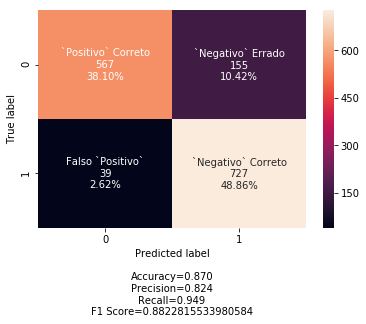

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

Los parametros optimizados son:
 {'XGB__subsample': 0.7, 'XGB__objective': 'reg:linear', 'XGB__n_estimators': 200, 'XGB__min_child_weight': 1, 'XGB__max_depth': 3, 'XGB__learning_rate': 0.1, 'XGB__colsample_bytree': 0.5, 'RNN__solver': 'adam', 'RNN__max_iter': 2000, 'RNN__learning_rate': 'adaptive', 'RNN__hidden_layer_sizes': (10, 40, 2), 'RNN__alpha': 0.1, 'RNN__activation': 'relu', 'RFOR__n_estimators': 1000, 'RFOR__min_samples_split': 5, 'RFOR__min_samples_leaf': 4, 'RFOR__max_features': 'sqrt', 'RFOR__max_depth': 20, 'RFOR__bootstrap': True, 'ABO__n_estimators': 936, 'ABO__learning_rate': 0.1, 'ABO__algorithm': 'SAMME.R'}


In [52]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
semilla_aleatoria = 1234
class_RFO = RandomForestClassifier(n_estimators=1000, min_samples_split= 5, min_samples_leaf=4, max_features= 'sqrt', max_depth= 20, bootstrap=True, random_state=semilla_aleatoria)
class_RNN = MLPClassifier(solver='adam',max_iter=2000, learning_rate='adaptive', hidden_layer_sizes=(10, 40, 2), alpha=0.1, activation='relu', random_state=semilla_aleatoria)
class_ABO = AdaBoostClassifier(n_estimators= 936, learning_rate= 0.1, algorithm= 'SAMME.R',random_state=semilla_aleatoria)
class_XGB = XGBClassifier(subsample= 0.7, objective='reg:linear', n_estimators= 200, min_child_weight= 1, max_depth= 3, learning_rate= 0.1, colsample_bytree= 0.5)
#class_ABO = GaussianProcessClassifier(1.0 * RBF(5.0))
dtc_model = VotingClassifier(estimators=[('RFOR', class_RFO),('RNN',class_RNN),('ABO', class_ABO),('XGB',class_XGB)], voting='hard')
dtc_model.fit(X_train, y_train)

[19:10:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:10:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


VotingClassifier(estimators=[('RFOR',
                              RandomForestClassifier(max_depth=20,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4,
                                                     min_samples_split=5,
                                                     n_estimators=1000,
                                                     random_state=1234)),
                             ('RNN',
                              MLPClassifier(alpha=0.1,
                                            hidden_layer_sizes=(10, 40, 2),
                                            learning_rate='adaptive',
                                            max_iter=2000, random_state=1234)),
                             ('ABO',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=936,...
                                   

In [53]:
y_pred = dtc_model.predict(X_test)
print(y_pred)

[1 0 1 ... 0 1 1]


In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.888\nPrecision=0.885\nRecall=0.901\nF1 Score=0.8926261319534281')

<hr>

In [55]:
def graficar_accuracy_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=semilla_aleatoria)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Ratio de éxito(Accuracy)/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Accuracy")    
    train_scores = cross_val_score(estimator, train_x,train_y, cv = kfold, n_jobs=jobs, scoring="accuracy")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs, scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

In [56]:
graficar_accuracy_scores(dtc_model,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

array([0.88077246, 0.89420655, 0.88403361, 0.90252101, 0.88823529])

### Tunning de los Hiperparametros de los Modelos
Correr únicamente si se desea hacer una mejora en los hiper parametros

parameter_space = {
    'RFOR__n_estimators':  [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'RFOR__max_features': ['auto', 'sqrt'],
    'RFOR__max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'RFOR__min_samples_split': [2, 5, 10],
    'RFOR__min_samples_leaf':  [1, 2, 4],
    'RFOR__bootstrap': [True, False],        
    'RNN__hidden_layer_sizes': [(10,40,2),(20,100,4),(20,100,2),(100,100,8),(10,200,4)],
    'RNN__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'RNN__solver': ['sgd', 'adam'],
    'RNN__alpha': [0.0001, 0.05, 0.02, 0.1],
    'RNN__max_iter': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 6)],              
    'RNN__learning_rate': ['constant','adaptive'],
    'ABO__n_estimators':  [int(x) for x in np.linspace(start = 50, stop = 2000, num = 12)],
    'ABO__learning_rate': [1.0, 0.1, 0.01, 0.001],
    'ABO__algorithm': ['SAMME', 'SAMME.R'],    
    'XGB__objective':'reg:linear',
    'XGB__learning_rate': [0.01, 0.1],
    'XGB__max_depth': [3, 5, 7, 10],
    'XGB__min_child_weight': [1, 3, 5, 7],
    'XGB__subsample': [0.5, 0.7, 1],
    'XGB__colsample_bytree': [0.5, 0.7, 1 ],
    'XGB__n_estimators' : [100, 200, 500],
    'XGB__objective': ['reg:squarederror','reg:linear']

}

clf_CV = RandomizedSearchCV(dtc_model, parameter_space, n_jobs=-1, cv=5)
clf_CV.fit(X_train, y_train) 
print('Los parametros optimizados son:\n', clf_CV.best_params_)

<hr>

## Scoring de la data requerida para hacer la entrega de la solución

Para el envío, necesita clasificar el siguiente dataset. Para hacer eso, usted necesita reproducir los mismos pasos de pre-procesamiento para que el dataset este en la misma estructura del que usted uso para construir su modelo. Despues de clasificar este dataframe, esperamos que usted entregue un archivo csv con las 2499 filar y una columna 'Graduado' con su predicción. **No cambie el orden del archivo a predecir ni borre filas**

In [57]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
df_to_be_predicted = pd.read_csv(r'ToBePredicted.csv')
df_to_be_predicted.tail()

--2020-09-14 19:12:14--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33892 (33K) [text/plain]
Saving to: ‘ToBePredicted.csv’

100%[======================================>] 33,892      --.-K/s   in 0.002s  

2020-09-14 19:12:14 (17.2 MB/s) - ‘ToBePredicted.csv’ saved [33892/33892]



studentId          reducido      ciclo
995    79594.0  Diagn. Psicoped.  2019 - 05
996    69470.0    Ventas Estrat.  2018 - 08
997    72921.0          Big Data  2019 - 02
998    80608.0  Interv. Psicoped  2019 - 05
999    86966.0  Interv. Psicoped  2019 - 07

In [58]:
df = pd.merge(
    df_to_be_predicted, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

df_m = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df_m.tail()
df=df_m
df_val = df.apply(extraer_materia, axis=1)
df['materias'] = df_val
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
studentId                1000 non-null float64
reducido                 1000 non-null object
ciclo                    1000 non-null object
Calificacion_Promedio    1000 non-null float64
Tareas_Puntuales         1000 non-null float64
Tareas_No_Entregadas     1000 non-null float64
Tareas_Retrasadas        1000 non-null float64
Total_Tareas             1000 non-null float64
Dias_Conectado           1000 non-null float64
Minutos_Promedio         1000 non-null float64
Minutos_Total            1000 non-null float64
materias                 1000 non-null object
dtypes: float64(9), object(3)
memory usage: 101.6+ KB


In [59]:
columnas_numericas = df._get_numeric_data().columns.values.tolist()
columnas = df.columns.values.tolist()
columnas_no_numericas = [v for v in columnas if v not in columnas_numericas]
df2 = DataFrameImputer().fit_transform(df)
df3 = DataScaleImputer(columns=columnas_no_numericas).fit_transform(df2)
df4,encoder = DataOneHotEncoderTransform(columns=columnas_numericas).fit_transform(df3)
df5 = DropColumns(columns=['studentId']).fit_transform(df4)
df6 = DropColumns(columns=columnas_eliminar).fit_transform(df5)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
Calificacion_Promedio    1000 non-null float64
Tareas_Puntuales         1000 non-null float64
Tareas_No_Entregadas     1000 non-null float64
Dias_Conectado           1000 non-null float64
Minutos_Promedio         1000 non-null float64
Minutos_Total            1000 non-null float64
dtypes: float64(6)
memory usage: 54.7 KB


In [60]:
y_pred = dtc_model.predict(df6)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Guardando los resultados de la predicción en un archivo csv

In [61]:
np.savetxt("results.csv", y_pred, delimiter=",", fmt='%s')

In [62]:
project.save_data(file_name="results.csv", data=pd.read_csv("results.csv", header=None).to_csv(header=["TARGET"], index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'btcanahuac-donotdelete-pr-u7zt94jlikswfz',
 'asset_id': '633738fa-6fcc-436c-a45d-bde7ca2c891f'}

<hr>

## ¡Felicitaciones!

Si todo fue ejecutado sin errores, usted ya tiene un modelo basado en classificacion binaria y puede descargar sus resultados para subirlos como csv!

Para enviar su solución, ve a la página:

# https://anahuac.maratona.dev
